In [ ]:
from midi2audio import FluidSynth

# FluidSynth().play_midi(r'D:\UNI\Thesis\NeuralNotes\JESU1.MID')
fs = FluidSynth(sample_rate=22050)
file_path = r'D:\UNI\Thesis\NeuralNotes\audio\client\bthvn_s14_mv1.mid'
fs.midi_to_audio(file_path, 'bthvn_s14_mv1.wav')

In [ ]:
import yaml

env = yaml.load(open('config.yaml', 'r'), Loader=yaml.FullLoader)

env['ROUTE']['audio']

In [ ]:
test_ds_path = r'D:\UNI\Thesis\NeuralNotes\agent\pickles\test_pieces.pkl'
import pickle

with open(test_ds_path, 'rb') as f:
    data = pickle.load(f)

data

In [ ]:
import pickle
with open(r'D:\UNI\Thesis\NeuralNotes\agent\pickles\remi_vocab.pkl', 'rb') as f:
    remi_data = pickle.load(f)

remi_data


In [ ]:
import pickle
with open(r'D:\UNI\Thesis\NeuralNotes\agent\pickles\remi_vocab_V2.pkl', 'rb') as f:
    remi_data_v2 = pickle.load(f)

remi_data_v2


In [ ]:
remi_vocab = {'None': 0,
              'Beat': 0, 
              'Chord': 0, 
              'Note_Duration': 0, 
              'Note_Pitch': 0, 
              'Note_Velocity': 0, 
              'Tempo': 0}

event2idx = remi_data_v2[0]

for vocab_key in remi_vocab.keys():
    for event_key in event2idx.keys():
        if vocab_key in event_key: 
            remi_vocab[vocab_key] += 1

remi_vocab

In [ ]:
all_events = 0

for vocab_key in remi_vocab.keys():
    all_events += remi_vocab[vocab_key]

all_events

In [ ]:
import pickle

sample_path = r'D:\UNI\Thesis\NeuralNotes\agent\remi_dataset\1.pkl'
with open(sample_path, 'rb') as f:
    sample = pickle.load(f)

sample

In [ ]:
import pickle

sample_path = r'D:\UNI\Thesis\NeuralNotes\0.pkl'
with open(sample_path, 'rb') as f:
    sample = pickle.load(f)

sample

In [ ]:
import os
import numpy as np

src = r'D:\UNI\Thesis\NeuralNotes\agent\remi_dataset'
polyph_dir_src = r'D:\UNI\Thesis\NeuralNotes\agent\remi_dataset\attr_cls\polyph'
rhythm_dir_src = r'D:\UNI\Thesis\NeuralNotes\agent\remi_dataset\attr_cls\rhythm'

tgt = r'D:\UNI\Thesis\NeuralNotes\results'
polyph_dir_tgt = r'D:\UNI\Thesis\NeuralNotes\results\attr_cls\polyph'
rhythm_dir_tgt = r'D:\UNI\Thesis\NeuralNotes\results\attr_cls\rhythm'

files = os.listdir(src)

rand_idx = np.random.randint(0, len(files), size=20)

In [ ]:
import shutil

print(rand_idx)

for idx in rand_idx: 
    filename = files[idx]
    src_file = os.path.join(src, filename)
    src_polyph = os.path.join(polyph_dir_src, filename)
    src_rhythm = os.path.join(rhythm_dir_src, filename)

    tgt_file = os.path.join(tgt, filename)
    tgt_polyph = os.path.join(polyph_dir_tgt, filename)
    tgt_rhythm = os.path.join(rhythm_dir_tgt, filename)

    shutil.copy(src_file, tgt_file)
    shutil.copy(src_polyph, tgt_polyph)
    shutil.copy(src_rhythm, tgt_rhythm)

# Evaluate Results of Small MM

In [109]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [110]:
def read_txt(dir):
    with open(dir, 'r') as file: 
        content = file.read()
    return content

def read_log(content): 
    content = content.split('\n')

def read_csv_regex(data, columns):
    df = pd.read_csv(data, delim_whitespace=True, names=columns)
    
    # remove front and ending blank spaces
    df = df.replace({"^\s*|\s*$":""}, regex=True) 
    
    # if there remained only empty string "", change to Nan
    df = df.replace({"":np.nan}) 
    return df

In [111]:
main_dir = r'agent\logs'
os.listdir(main_dir)

['logs', 'valloss']

In [185]:
keyword = 'mm_small'

log_dir = os.path.join(main_dir, 'logs')
val_dir = os.path.join(main_dir, 'valloss')


log_files = [f for f in os.listdir(log_dir) if keyword in f]
val_files = [f for f in os.listdir(val_dir) if keyword in f]

In [183]:
filename_dict = {
    'mm_small': 'mm_in', 
    'mm_small_pre': 'mm_pre', 
    'mm_small_v2_0_1': 'mm_v2_ldpe',
    'mm_small_v2_0_2': 'mm_v2_lrpe',
    'mm_small_v2_0_1_pre': 'mm_v2_ldpe_pre',
    'mm_small_v2_0_2_pre': 'mm_v2_lrpe_pre',
    'mm_small_v2_0_11_in_640': 'mm_v2_ldpe_in_len_640',
    'mm_small_v2_0_12_in_640': 'mm_v2_lrpe_in_len_640',
    'mm_small_v2_0_11_pre_640': 'mm_v2_ldpe_pre_len_640',
    'mm_small_v2_0_12_pre_640': 'mm_v2_lrpe_pre_len_640',
    'mm_small_v2_1_1': 'mm_v3_ldpe',
    'mm_small_v2_1_2': 'mm_v3_lrpe',
    'mm_small_v2_1_1_pre': 'mm_v3_ldpe_pre',
    'mm_small_v2_1_2_pre': 'mm_v3_lrpe_pre',
    'mm_small_v2_1_11_in_640': 'mm_v3_ldpe_in_len_640',
    'mm_small_v2_1_12_in_640': 'mm_v3_lrpe_in_len_640',
    'mm_small_v2_1_11_pre_640': 'mm_v3_ldpe_pre_len_640',
    'mm_small_v2_1_12_pre_640': 'mm_v3_lrpe_pre_len_640',
}

## Read logs

```
mm_small:   2.29898      3.74499      3.74499      241.37  
mm_small_v2_0_1: 2.33376      3.81529      3.81529      96.41 
mm_small_v2_0_2: 2.31323      3.57724      3.57724      99.05 
mm_small_v2_1_1: 2.41935      3.73197      3.73197      242.45   
mm_small_v2_1_2:  2.30584      3.83637      3.83637      98.28  
```


In [186]:
log_files

['mm_small.txt',
 'mm_small_pre.txt',
 'mm_small_v2_0_1.txt',
 'mm_small_v2_0_11_in_640.txt',
 'mm_small_v2_0_11_pre_640.txt',
 'mm_small_v2_0_12_in_640.txt',
 'mm_small_v2_0_12_pre_640.txt',
 'mm_small_v2_0_1_pre.txt',
 'mm_small_v2_0_2.txt',
 'mm_small_v2_0_2_pre.txt',
 'mm_small_v2_1_1.txt',
 'mm_small_v2_1_11_in_640.txt',
 'mm_small_v2_1_11_pre_640.txt',
 'mm_small_v2_1_12_in_640.txt',
 'mm_small_v2_1_12_pre_640.txt',
 'mm_small_v2_1_1_pre.txt',
 'mm_small_v2_1_2.txt',
 'mm_small_v2_1_2_pre.txt']

In [146]:
log_dict = {}
columns = ['ep', 'steps', 'recons_loss', 'kldiv_loss', 'kldiv_raw', 'ep_time']

for f in log_files: 
    filename = f.split('.')[0]
    filename = filename_dict[filename]
    log_file = os.path.join(main_dir, 'logs', f)
    log_dict[filename] = read_csv_regex(log_file, columns=columns)
    log_dict[filename]['total_loss'] = log_dict[filename]['recons_loss'] + 1.0 * log_dict[filename]['kldiv_loss']

log_dict

{'mm_in':      ep  steps  recons_loss  kldiv_loss  kldiv_raw  ep_time  total_loss
 0     1     10      6.28121     0.25000    0.01529     5.44     6.53121
 1     1     20      6.27149     0.25000    0.01553    10.67     6.52149
 2     1     30      6.24943     0.25000    0.01697    15.63     6.49943
 3     1     40      6.21303     0.25000    0.02197    21.01     6.46303
 4     1     50      6.15465     0.25000    0.03299    26.20     6.40465
 ..   ..    ...          ...         ...        ...      ...         ...
 365  20   3470      2.31845     3.71265    3.71265   188.19     6.03110
 366  20   3480      2.30437     3.71242    3.71242   193.75     6.01679
 367  20   3490      2.30497     3.71200    3.71200   198.91     6.01697
 368  20   3500      2.29898     3.74499    3.74499   204.01     6.04397
 369  20   3500      2.29898     3.74499    3.74499   241.37     6.04397
 
 [370 rows x 7 columns],
 'mm_pre':      ep  steps  recons_loss  kldiv_loss  kldiv_raw  ep_time  total_loss
 0   

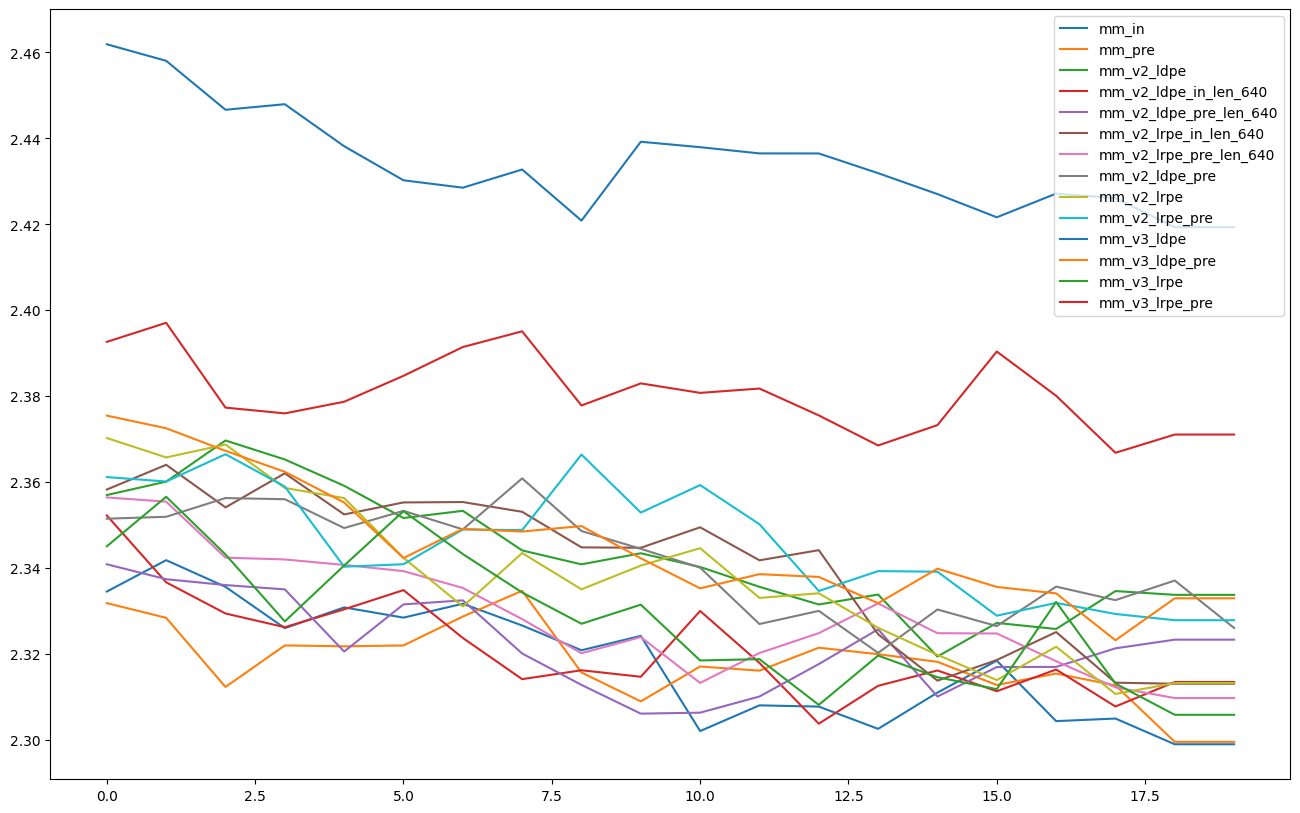

In [147]:
attribute = 'recons_loss'
# steps = len(log_dict['mm_small'][attribute])
steps = 20
plt.figure(figsize=(16, 10))
for key in log_dict.keys():
    data = log_dict[key][attribute][350: ]
    plt.plot(range(steps), data, label=key)
    plt.legend()

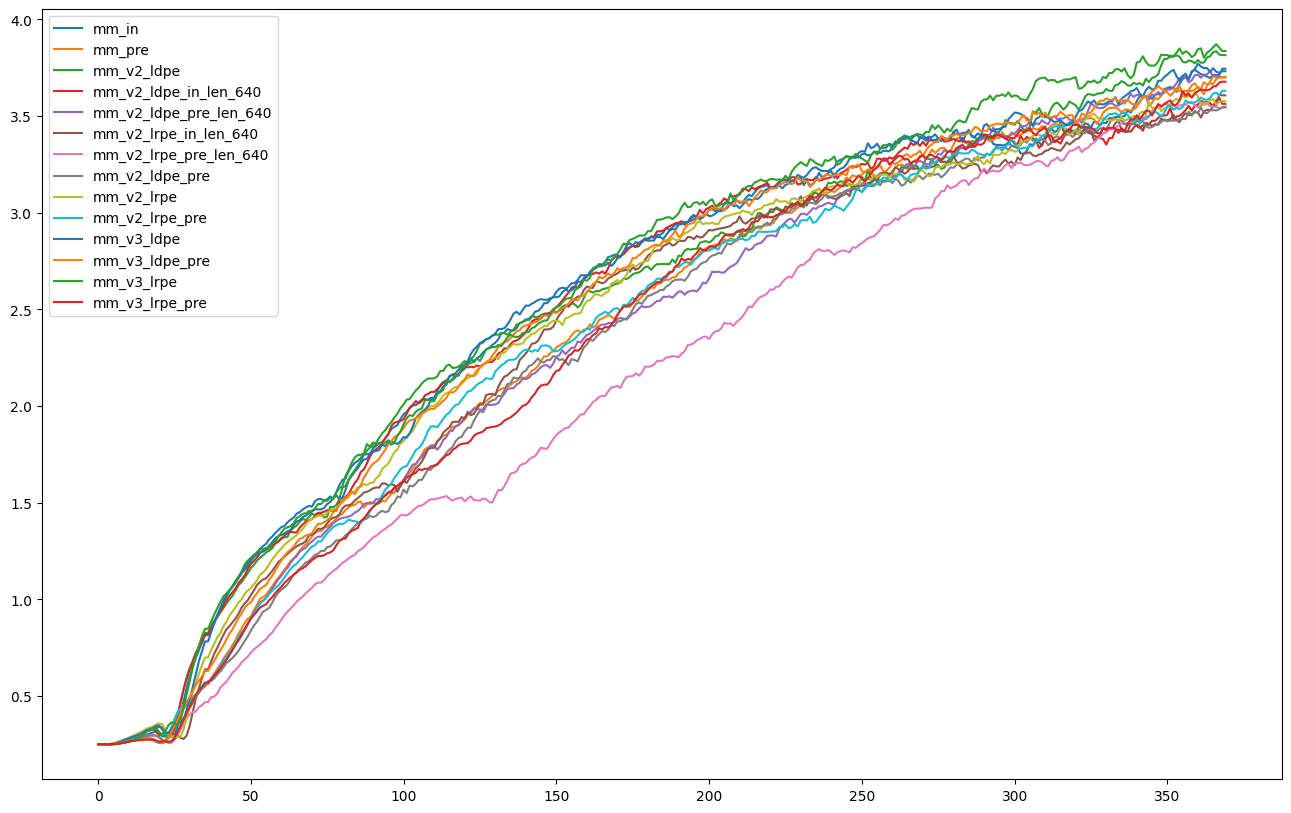

In [149]:
attribute = 'kldiv_loss'
steps = len(log_dict['mm_in'][attribute])
plt.figure(figsize=(16, 10))
for key in log_dict.keys():
    data = log_dict[key][attribute]
    plt.plot(range(steps), data, label=key)
    plt.legend()

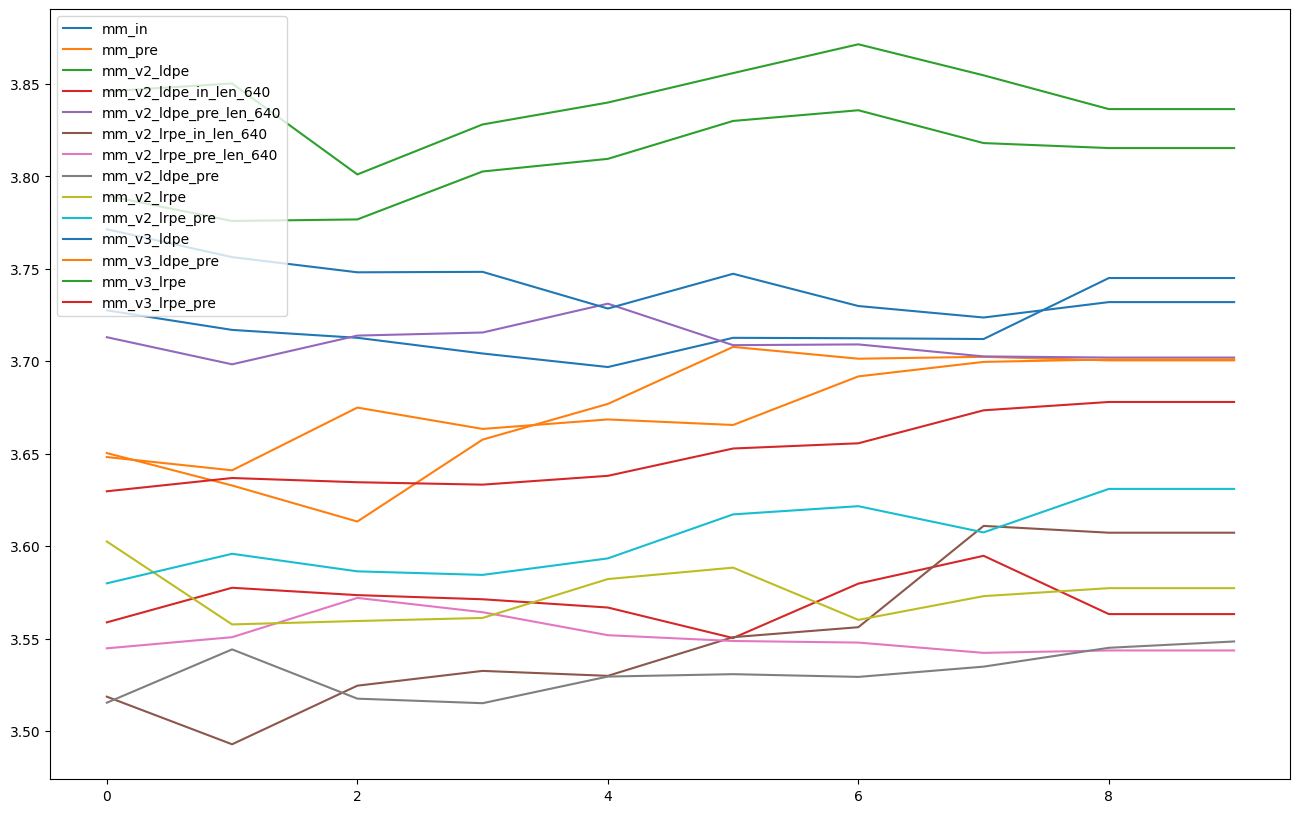

In [150]:
attribute = 'kldiv_loss'
# steps = len(log_dict['mm_small'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in log_dict.keys():
    data = log_dict[key][attribute][360: ]
    plt.plot(range(steps), data, label=key)
    plt.legend()

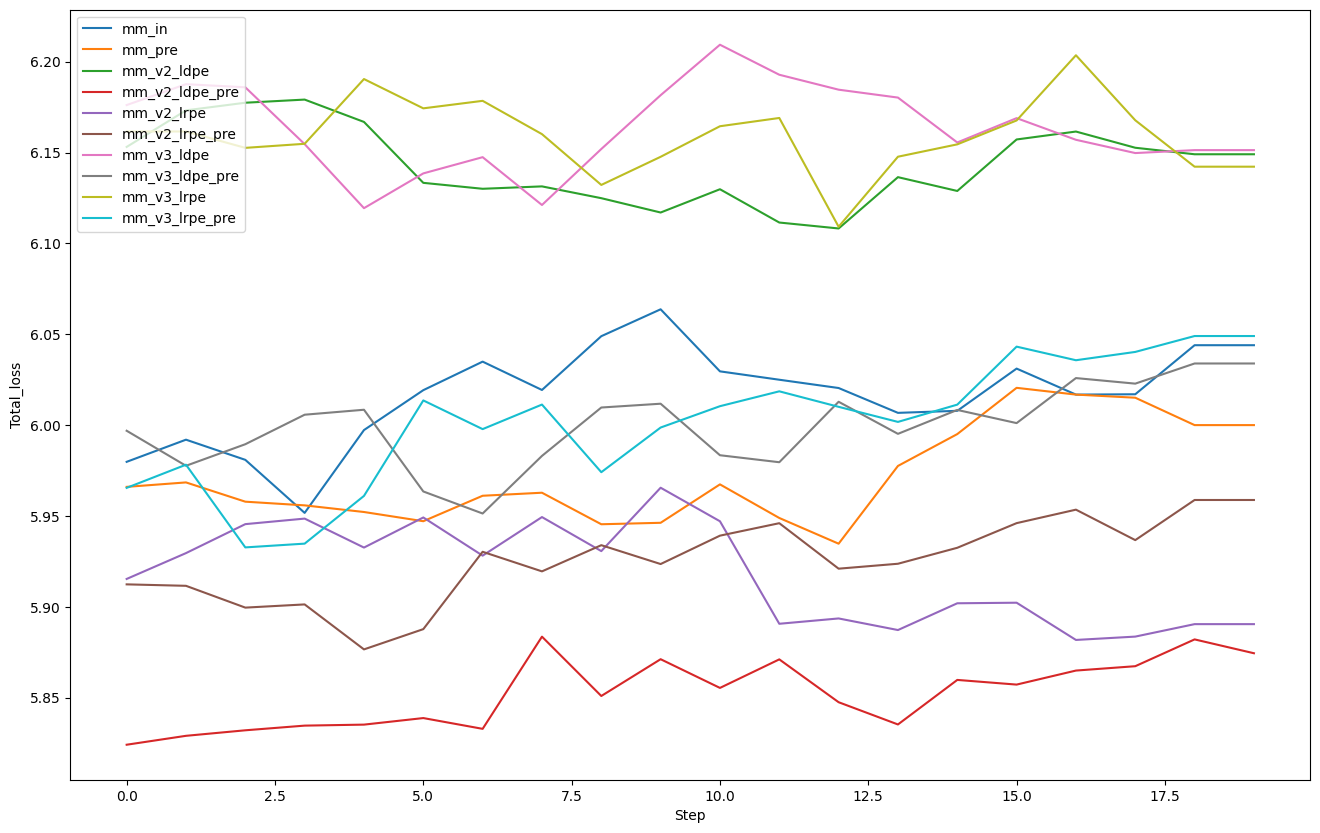

In [197]:
attribute = 'total_loss'
# steps = len(log_dict['mm_small'][attribute])
steps = 20
plt.figure(figsize=(16, 10))
for key in log_dict.keys():
    if '640' in key: 
        continue
    data = log_dict[key][attribute][350: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('Total_loss')
plt.legend(loc='upper left')

## Read Val-loss

``````
mm_small:   [step 3500] RC: 2.2990 | KL: 3.7450 | [val] | RC: 2.2693 | KL: 3.8752
            [step 3500] RC: 2.2995 | KL: 3.7005 | [val] | RC: 2.2441 | KL: 3.7564
mm_small_v2_0_1: [step 3500] RC: 2.3338 | KL: 3.8153 | [val] | RC: 2.2766 | KL: 3.8630
mm_small_v2_0_2: [step 3500] RC: 2.3132 | KL: 3.5772 | [val] | RC: 2.2753 | KL: 3.7222
                 [step 3500] RC: 2.3261 | KL: 3.5484 | [val] | RC: 2.2571 | KL: 3.6659
mm_small_v2_1_1: [step 3500] RC: 2.6340 | KL: 2.9750 | [val] | RC: 2.6259 | KL: 3.0461
mm_small_v2_1_2: [step 3500] RC: 2.3058 | KL: 3.8364 | [val] | RC: 2.2742 | KL: 3.9127
                [step 3500] RC: 2.3711 | KL: 3.6779 | [val] | RC: 2.3183 | KL: 3.8221
```


In [187]:
def process_valloss_file(content): 
    content = content.split('\n')

    content_dict = {
    'recons_train': [],
    'kl_train': [],
    'recons_val': [],
    'kl_val': []
}


    for idx in range(len(content)):
        try:
            row = content[idx].split(' ')
            recon_train = float(row[3])
            kl_train = float(row[6])
            recon_val = float(row[11])
            kl_val = float(row[14])

            content_dict['recons_train'].append(recon_train)
            content_dict['kl_train'].append(kl_train)
            content_dict['recons_val'].append(recon_val)
            content_dict['kl_val'].append(kl_val)
        except: 
            continue

    return content_dict

In [188]:
val_files

['mm_small.txt',
 'mm_small_pre.txt',
 'mm_small_v2_0_1.txt',
 'mm_small_v2_0_11_in_640.txt',
 'mm_small_v2_0_11_pre_640.txt',
 'mm_small_v2_0_12_in_640.txt',
 'mm_small_v2_0_12_pre_640.txt',
 'mm_small_v2_0_1_pre.txt',
 'mm_small_v2_0_2.txt',
 'mm_small_v2_0_2_pre.txt',
 'mm_small_v2_1_1.txt',
 'mm_small_v2_1_11_in_640.txt',
 'mm_small_v2_1_11_pre_640.txt',
 'mm_small_v2_1_12_in_640.txt',
 'mm_small_v2_1_12_pre_640.txt',
 'mm_small_v2_1_1_pre.txt',
 'mm_small_v2_1_2.txt',
 'mm_small_v2_1_2_pre.txt']

In [189]:
val_collection = {}
beta = 1.0
for f in val_files:
    filename = f.split('.')[0]
    filename = filename_dict[filename]
    file_dir = os.path.join(main_dir, 'valloss', f)
    content = read_txt(file_dir)
    content = process_valloss_file(content)
    content = pd.DataFrame(content)
    val_collection[filename] = content
    val_collection[filename]['total_loss_train'] = val_collection[filename]['recons_train'] + beta * val_collection[filename]['kl_train']
    val_collection[filename]['total_loss_val'] = val_collection[filename]['recons_val'] + beta * val_collection[filename]['kl_val']
    
val_collection

{'mm_in':     recons_train  kl_train  recons_val  kl_val  total_loss_train  \
 0         6.1547    0.0330      6.0112  0.0630            6.1877   
 1         5.6360    0.1344      5.3915  0.1758            5.7704   
 2         5.0849    0.2182      4.8929  0.2559            5.3031   
 3         4.7918    0.2839      4.7250  0.2261            5.0757   
 4         4.6633    0.2447      4.5098  0.3443            4.9080   
 ..           ...       ...         ...     ...               ...   
 65        2.3429    3.6147      2.3128  3.7313            5.9576   
 66        2.3260    3.6257      2.2958  3.7869            5.9517   
 67        2.3209    3.7281      2.2852  3.8191            6.0490   
 68        2.3026    3.7042      2.2790  3.8454            6.0068   
 69        2.2990    3.7450      2.2693  3.8752            6.0440   
 
     total_loss_val  
 0           6.0742  
 1           5.5673  
 2           5.1488  
 3           4.9511  
 4           4.8541  
 ..             ...  
 65    

In [159]:
val_collection['mm_in'].columns

Index(['recons_train', 'kl_train', 'recons_val', 'kl_val', 'total_loss_train',
       'total_loss_val'],
      dtype='object')

In [191]:
row = 0
for key in val_collection.keys():row = 0
for key in val_collection.keys():
    data = val_collection[key].iloc[-1, :]
    print('{:<5}: {:<25}| [train] | RC: {:.4f} | KL: {:.4f} | [val] | RC: {:.4f} | KL: {:.4f}'.format(row, key, data.iloc[0], data.iloc[1], data.iloc[2], data.iloc[3]))
    row += 1

0    : mm_in                    | [train] | RC: 2.2990 | KL: 3.7450 | [val] | RC: 2.2693 | KL: 3.8752
1    : mm_pre                   | [train] | RC: 2.2995 | KL: 3.7005 | [val] | RC: 2.2441 | KL: 3.7564
2    : mm_v2_ldpe               | [train] | RC: 2.3338 | KL: 3.8153 | [val] | RC: 2.2766 | KL: 3.8630
3    : mm_v2_ldpe_in_len_640    | [train] | RC: 2.3135 | KL: 3.5632 | [val] | RC: 2.2495 | KL: 3.7080
4    : mm_v2_ldpe_pre_len_640   | [train] | RC: 2.3233 | KL: 3.7020 | [val] | RC: 2.2467 | KL: 3.7996
5    : mm_v2_lrpe_in_len_640    | [train] | RC: 2.3131 | KL: 3.6072 | [val] | RC: 2.2615 | KL: 3.7055
6    : mm_v2_lrpe_pre_len_640   | [train] | RC: 2.3097 | KL: 3.5435 | [val] | RC: 2.2548 | KL: 3.6618
7    : mm_v2_ldpe_pre           | [train] | RC: 2.3261 | KL: 3.5484 | [val] | RC: 2.2571 | KL: 3.6659
8    : mm_v2_lrpe               | [train] | RC: 2.3132 | KL: 3.5772 | [val] | RC: 2.2753 | KL: 3.7222
9    : mm_v2_lrpe_pre           | [train] | RC: 2.3279 | KL: 3.6309 | [val] | RC: 

In [193]:
row = 0
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key].iloc[-1, :]
    print('{:<5}: {:<25}| [train] | MM_Loss: {:.4f} | [val] | MM_Loss: {:.4f} | '.format(row, key, data.iloc[4], data.iloc[5]))
    row += 1

0    : mm_in                    | [train] | MM_Loss: 6.0440 | [val] | MM_Loss: 6.1445 | 
1    : mm_pre                   | [train] | MM_Loss: 6.0000 | [val] | MM_Loss: 6.0005 | 
2    : mm_v2_ldpe               | [train] | MM_Loss: 6.1491 | [val] | MM_Loss: 6.1396 | 
3    : mm_v2_ldpe_pre           | [train] | MM_Loss: 5.8745 | [val] | MM_Loss: 5.9230 | 
4    : mm_v2_lrpe               | [train] | MM_Loss: 5.8904 | [val] | MM_Loss: 5.9975 | 
5    : mm_v2_lrpe_pre           | [train] | MM_Loss: 5.9588 | [val] | MM_Loss: 5.9855 | 
6    : mm_v3_ldpe               | [train] | MM_Loss: 5.6090 | [val] | MM_Loss: 5.6720 | 
7    : mm_v3_ldpe_pre           | [train] | MM_Loss: 6.0340 | [val] | MM_Loss: 6.0060 | 
8    : mm_v3_lrpe               | [train] | MM_Loss: 6.1422 | [val] | MM_Loss: 6.1869 | 
9    : mm_v3_lrpe_pre           | [train] | MM_Loss: 6.0490 | [val] | MM_Loss: 6.1404 | 


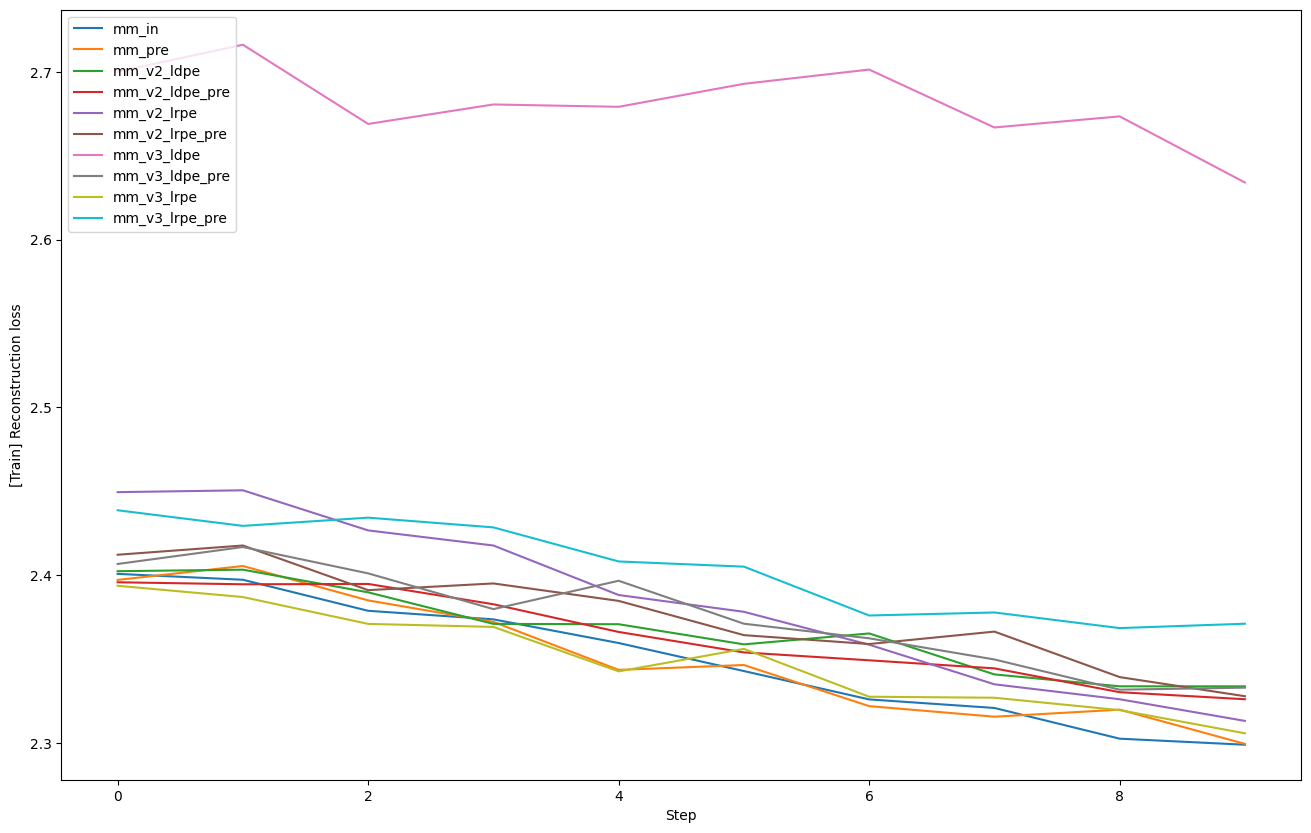

In [204]:
attribute = 'recons_train'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key][attribute][60: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('[Train] Reconstruction loss')
plt.legend(loc='upper left')

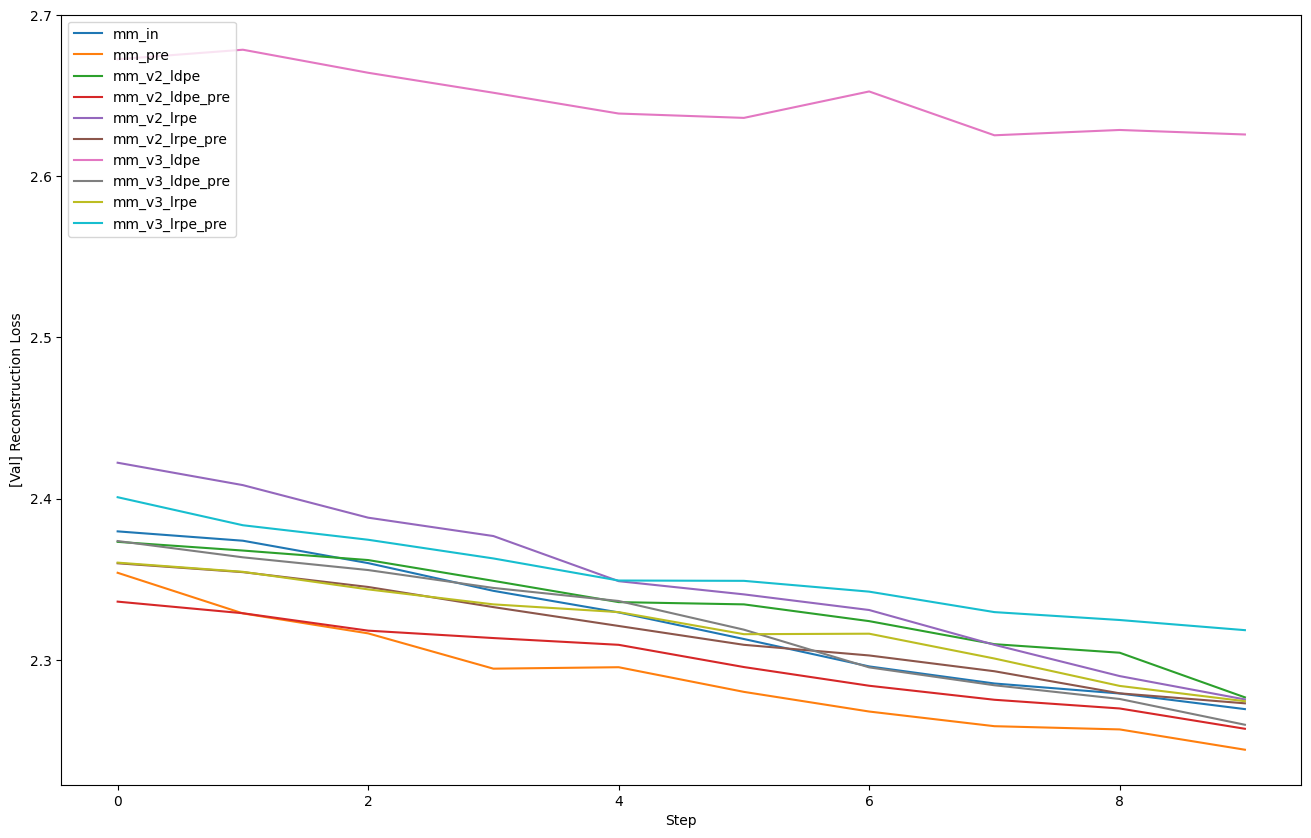

In [205]:
attribute = 'recons_val'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key][attribute][60: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('[Val] Reconstruction Loss')
plt.legend(loc='upper left')

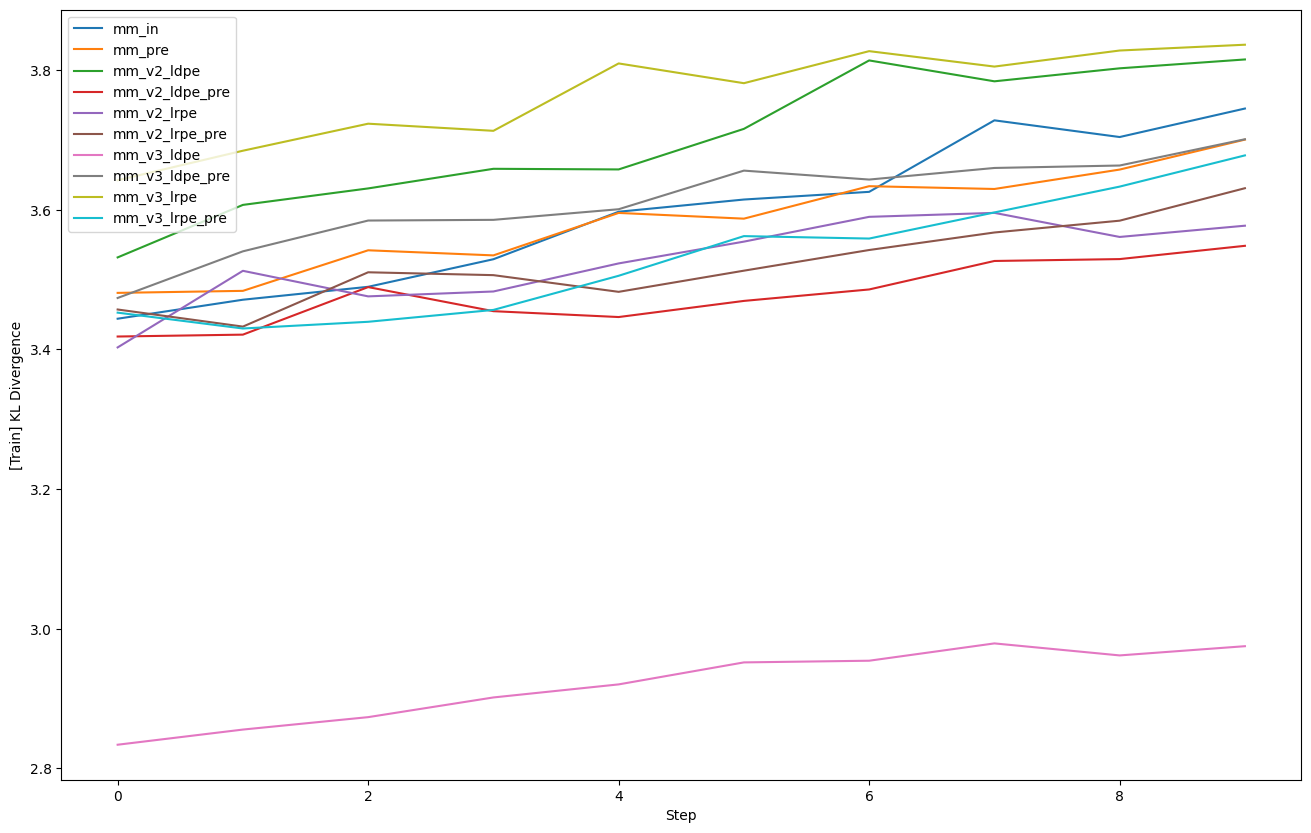

In [206]:
attribute = 'kl_train'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key][attribute][60: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('[Train] KL Divergence')
plt.legend(loc='upper left')

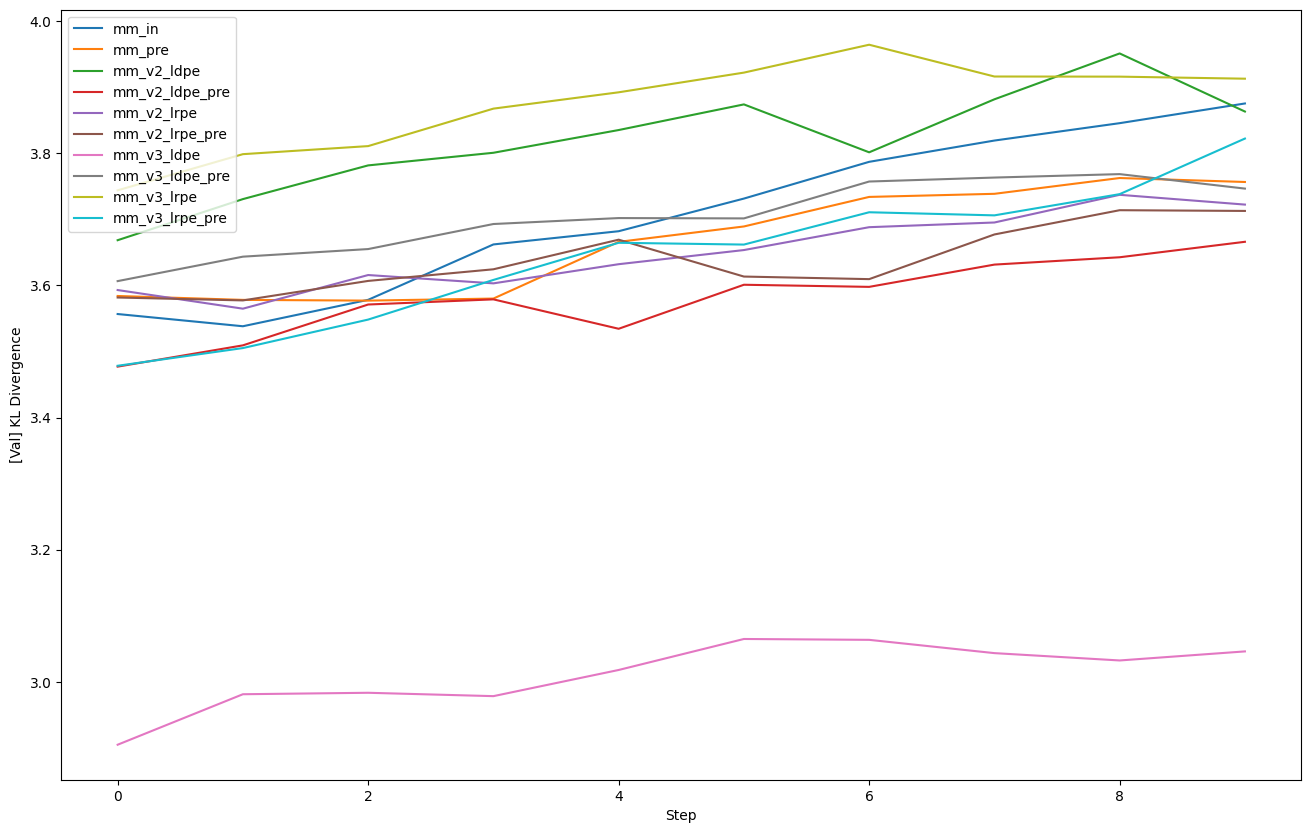

In [207]:
attribute = 'kl_val'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key][attribute][60: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('[Val] KL Divergence')
plt.legend(loc='upper left')

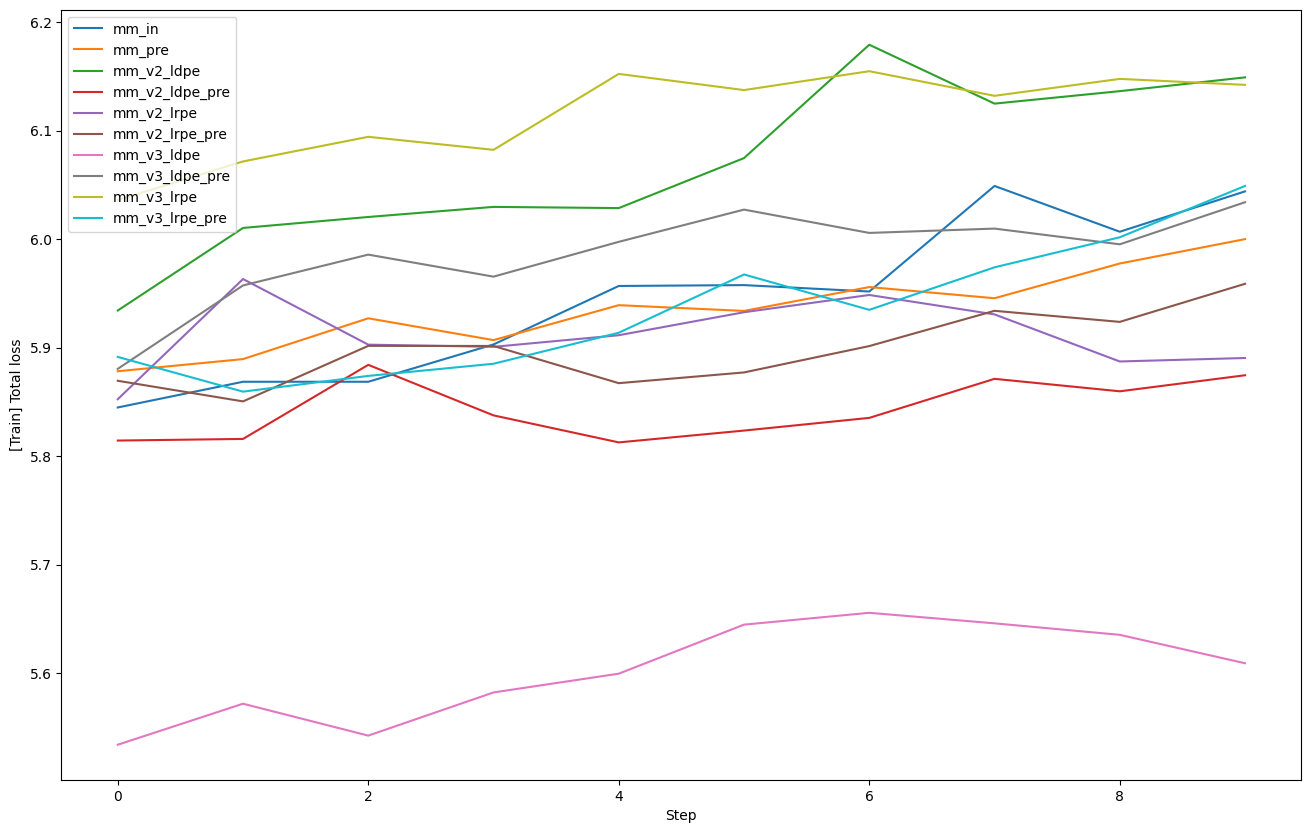

In [201]:
attribute = 'total_loss_train'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key][attribute][60: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('[Train] Total loss')
plt.legend(loc='upper left')

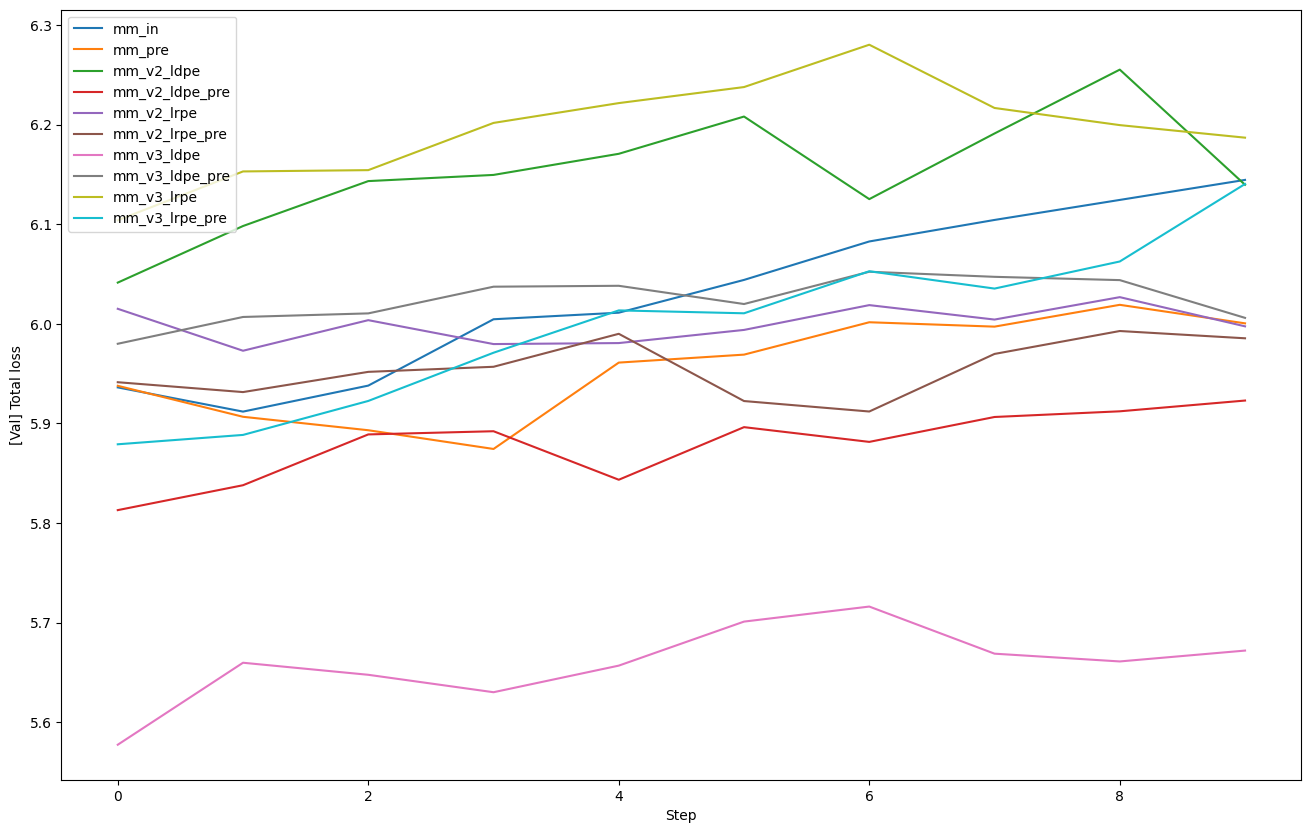

In [202]:
attribute = 'total_loss_val'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    if '640' in key: 
        continue
    data = val_collection[key][attribute][60: ]
    plt.plot(range(steps), data, label=key)

plt.xlabel('Step')
plt.ylabel('[Val] Total loss')
plt.legend(loc='upper left')

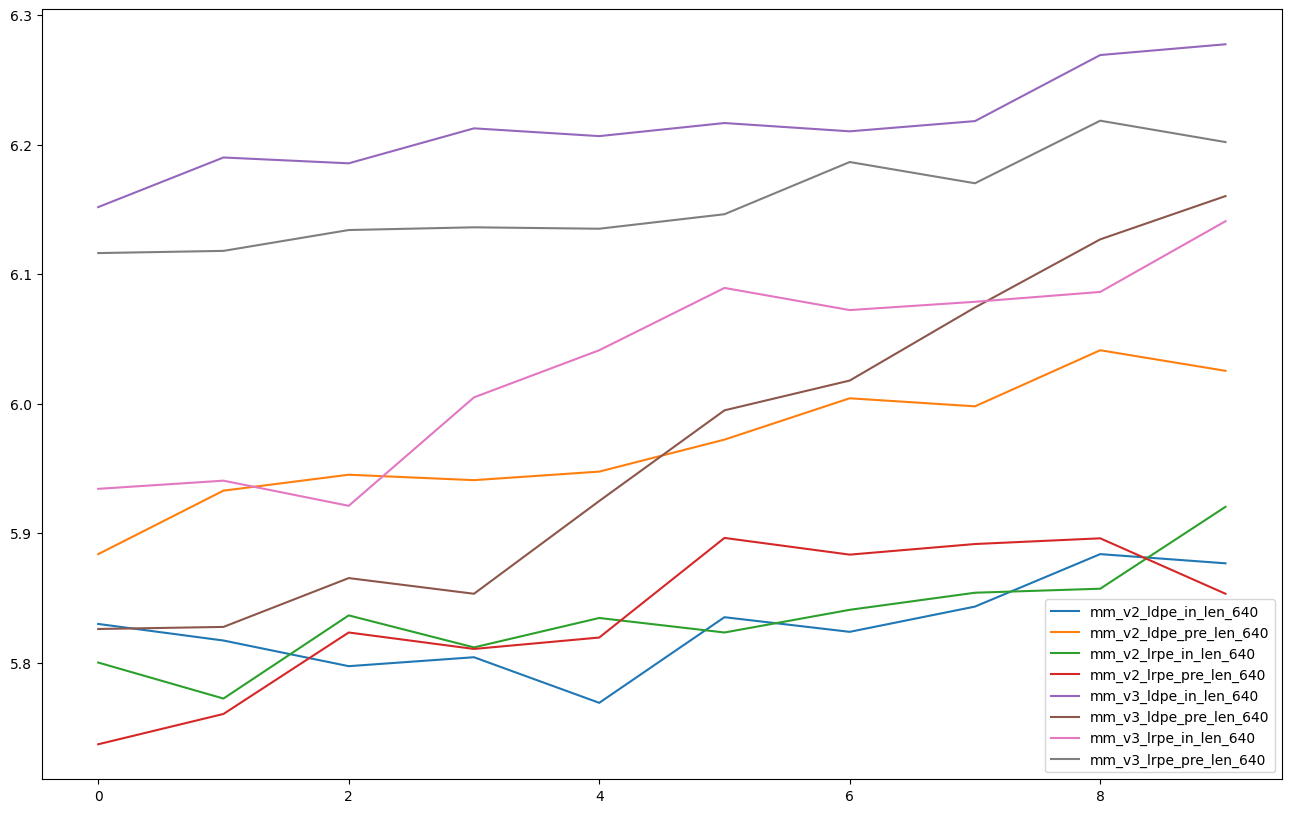

In [198]:
attribute = 'total_loss_train'
# steps = len(val_collection['mm_in'][attribute])
steps = 10
plt.figure(figsize=(16, 10))
for key in val_collection.keys():
    try:
        if not '640' in key: 
            continue
        data = val_collection[key][attribute][60: ]
        plt.plot(range(steps), data, label=key)
        plt.legend()
    except:
        print(key)




In [103]:
content_dict = {
    'recon_train': [],
    'kl_train': [],
    'recon_val': [],
    'kl_val': []
}


for idx in range(len(content)):
    try:
        row = content[idx].split(' ')
        recon_train = float(row[3])
        kl_train = float(row[6])
        recon_val = float(row[11])
        kl_val = float(row[14])

        content_dict['recon_train'].append(recon_train)
        content_dict['kl_train'].append(kl_train)
        content_dict['recon_val'].append(recon_val)
        content_dict['kl_val'].append(kl_val)
    except: 
        print(idx)

{'recon_train': [6.1547,
  5.636,
  5.0849,
  4.7918,
  4.6633,
  4.1348,
  3.703,
  3.4623,
  3.3567,
  3.2873,
  3.2427,
  3.2138,
  3.1744,
  3.1467,
  3.1208,
  3.0911,
  3.0641,
  3.0487,
  3.0237,
  3.0242,
  3.0227,
  2.9989,
  2.9819,
  2.9654,
  2.9688,
  2.96,
  2.9351,
  2.8996,
  2.8669,
  2.8529,
  2.8318,
  2.809,
  2.7872,
  2.7697,
  2.7395,
  2.7172,
  2.7213,
  2.7024,
  2.6789,
  2.6799,
  2.6592,
  2.6515,
  2.6369,
  2.6259,
  2.6072,
  2.5965,
  2.585,
  2.5776,
  2.575,
  2.5587,
  2.5287,
  2.527,
  2.5007,
  2.4924,
  2.4776,
  2.4723,
  2.4564,
  2.4485,
  2.435,
  2.4317,
  2.4008,
  2.3973,
  2.3788,
  2.3737,
  2.3596,
  2.3429,
  2.326,
  2.3209,
  2.3026,
  2.299],
 'kl_train': [0.033,
  0.1344,
  0.2182,
  0.2839,
  0.2447,
  0.5956,
  0.8142,
  0.9829,
  1.1105,
  1.2226,
  1.3251,
  1.3985,
  1.4649,
  1.5187,
  1.5384,
  1.6375,
  1.7253,
  1.8319,
  1.9335,
  2.0042,
  2.0428,
  2.1254,
  2.1931,
  2.2579,
  2.3447,
  2.3901,
  2.4453,
  2.5319,
  2.

In [ ]:
row = content[0].split(' ')
recon_train_list = []
kl_train_list = []
recon_val_list = []
kl_val_list = []

row

In [ ]:
recon_train = float(row[3])
kl_train = float(row[6])
recond_val = float(row[11])
kl_val = float(row[14])